This needs proper notes. Take help from here: http://scienceworld.wolfram.com/physics/DoublePendulum.html

Needs a diagram to explain the system.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
from scipy.integrate import odeint

Solve the ODEs:

In [2]:
g = 9.8 #acceleration due to gravity, in m/s^2
L1 = 1.0 #length of string of pendulum1.
L2 = 1.0 #length of string of pendulum2.
m1 = 1.0 #mass of pendulum1.
m2 = 1.0 #mass of pendulum2.

In [3]:
def DoublePend(x, t, g, L1, L2, m1, m2):
    x1, x2, x3, x4 = x
    
    a1 = (m1 + m2) * (L1**2)
    b1 = m2 * L1 * L2 * np.cos(x1 - x2)
    c1 = m2 * (L2**2)
    x1dot = (c1*x3 - b1*x4)/(a1*c1 - b1**2)
    
    a2 = (m1 + m2) * (L1**2)
    b2 = m2 * L1 * L2 * np.cos(x1 - x2)
    c2 = m2 * (L2**2)
    x2dot = (b2*x3 - a2*x4)/(b2**2 - a2*c2)

    x3dot = (- m2 * L1 * L2 * np.sin(x1 - x2) * x1dot * x2dot
             - m1 * g * L1 * np.sin(x1) - m2 * g * L1 * np.sin(x1))
    
    x4dot = (m2 * L1 * L2 * np.sin(x1 - x2) * x1dot * x2dot
             - m2 * g * L2 * np.sin(x2))
    
    xdot = [x1dot, x2dot, x3dot, x4dot]
    
    return xdot

In [4]:
x0_a = [np.pi/2., np.pi/3., 0.0, 0.0] #IC of double pendulum 1.
x0_b = [np.pi/2+0.01, np.pi/3., 0.0, 0.0] #IC of double pendulum 2.

In [5]:
NumOfAnim = 201

In [6]:
t = np.linspace(0, 20, NumOfAnim)

In [7]:
%%time
sol_a = odeint(DoublePend, x0_a, t, args=(g, L1, L2, m1, m2))
sol_b = odeint(DoublePend, x0_b, t, args=(g, L1, L2, m1, m2))

CPU times: user 138 ms, sys: 4.08 ms, total: 142 ms
Wall time: 143 ms


Set up the figure, axis, and the plot element we want to animate:

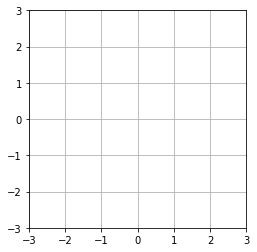

In [8]:
fig, ax = plt.subplots()

ax.set_aspect("equal")
ax.set_xlim((-3, 3))
ax.set_ylim((-3, 3))

ax.grid(True)

# Bobs and strings for double pendulum 1:
MyBob_a1, = ax.plot([], [], "bo-", lw=2, zorder=2)
MyBob_a2, = ax.plot([], [], "ro-", lw=2, zorder=2)

MyString_a1, = ax.plot([], [], "k.-", lw=2, zorder=1)
MyString_a2, = ax.plot([], [], "k.-", lw=2, zorder=1)

# Bobs and strings for double pendulum 2:
MyBob_b1, = ax.plot([], [], "bo-", lw=2, zorder=2)
MyBob_b2, = ax.plot([], [], "ro-", lw=2, zorder=2)

MyString_b1, = ax.plot([], [], "k.-", lw=2, zorder=1)
MyString_b2, = ax.plot([], [], "k.-", lw=2, zorder=1)

# Text:
MyText = ax.text(0.01, 0.01, '', transform=ax.transAxes)
# NOTE THE POSITION OF MyText!!!

Define the initialization function, which plots the background of each frame:

In [9]:
def init():
    # Double pendulum 1:
    MyBob_a1.set_data([], [])
    MyBob_a2.set_data([], [])
    MyString_a1.set_data([], [])
    MyString_a2.set_data([], [])
    
    # Double pendulum 2:
    MyBob_b1.set_data([], [])
    MyBob_b2.set_data([], [])
    MyString_b1.set_data([], [])
    MyString_b2.set_data([], [])
    
    # Text:
    MyText.set_text('')
    
    return (MyBob_a1, MyBob_a2, MyString_a1, MyString_a2,
            MyBob_b1, MyBob_b2, MyString_b1, MyString_b2,
            MyText)

Define the animation function, which is called for each new frame:

In [10]:
def animate(i):
    
    # Double pendulum 1:
    # Coods of bob 1:
    xa1 = L1*np.sin(sol_a[i,0])
    ya1 = -L1*np.cos(sol_a[i,0])
    
    # Coods of ends of string 1:
    xa1Data = np.array([0, xa1])
    ya1Data = np.array([0, ya1])
    
    # Coods of bob 2:
    xa2 = L1*np.sin(sol_a[i,0]) + L2*np.sin(sol_a[i,1])
    ya2 = -L1*np.cos(sol_a[i,0]) - L2*np.cos(sol_a[i,1])
    
    # Coods of ends of string 2:
    xa2Data = np.array([xa1, xa2])
    ya2Data = np.array([ya1, ya2])
    
    # Set data for animation:
    MyBob_a1.set_data(xa1, ya1)
    MyString_a1.set_data(xa1Data, ya1Data)
    
    MyBob_a2.set_data(xa2, ya2)
    MyString_a2.set_data(xa2Data, ya2Data)
    #--------------------
    # Double pendulum 2:
    # Coods of bob 1:
    xb1 = L2*np.sin(sol_b[i,0])
    yb1 = -L2*np.cos(sol_b[i,0])
    
    # Coods of ends of string 1:
    xb1Data = np.array([0, xb1])
    yb1Data = np.array([0, yb1])
    
    # Coods of bob 2:
    xb2 = L1*np.sin(sol_b[i,0]) + L2*np.sin(sol_b[i,1])
    yb2 = -L1*np.cos(sol_b[i,0]) - L2*np.cos(sol_b[i,1])
    
    # Coods of ends of string 2:
    xb2Data = np.array([xb1, xb2])
    yb2Data = np.array([yb1, yb2])
    
    # Set data for animation:
    MyBob_b1.set_data(xb1, yb1)
    MyString_b1.set_data(xb1Data, yb1Data)
    
    MyBob_b2.set_data(xb2, yb2)
    MyString_b2.set_data(xb2Data, yb2Data)
    #--------------------
    # Set text:
    #MyText.set_text("hello")
    MyText.set_text('t={:.4f}'.format(t[i]))
    #MyText.set_text('x={:.2f}, y={:.2f}'.format(x, y))
    
    return (MyBob_a1, MyBob_a2, MyString_a1, MyString_a2,
            MyBob_b1, MyBob_b2, MyString_b1, MyString_b2,
            MyText)

Compile the animation. Setting ```blit=True``` will only redraw parts that have changed:

In [11]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=range(0, NumOfAnim),
                               interval=100,
                               blit=True, repeat=False)

In [12]:
%%time
HTML(anim.to_jshtml())

CPU times: user 11.7 s, sys: 239 ms, total: 12 s
Wall time: 12.2 s
